



# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/food_order.csv')

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### Getting to know the data

In [ ]:

df.shape

(1898, 9)

1898 rows
9 columns

#### Observations:


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


#### Observations:


In [ ]:

df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:



*   Average delivery time for all the orders is 24mins
*   Average food preparation time is 16mins







### Not rated orders

In [ ]:

df[df['rating'] == 'Not given'].shape[0]

736

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Exploring all the variables and provide observations on their distributions. (Generally, distinct number of values, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


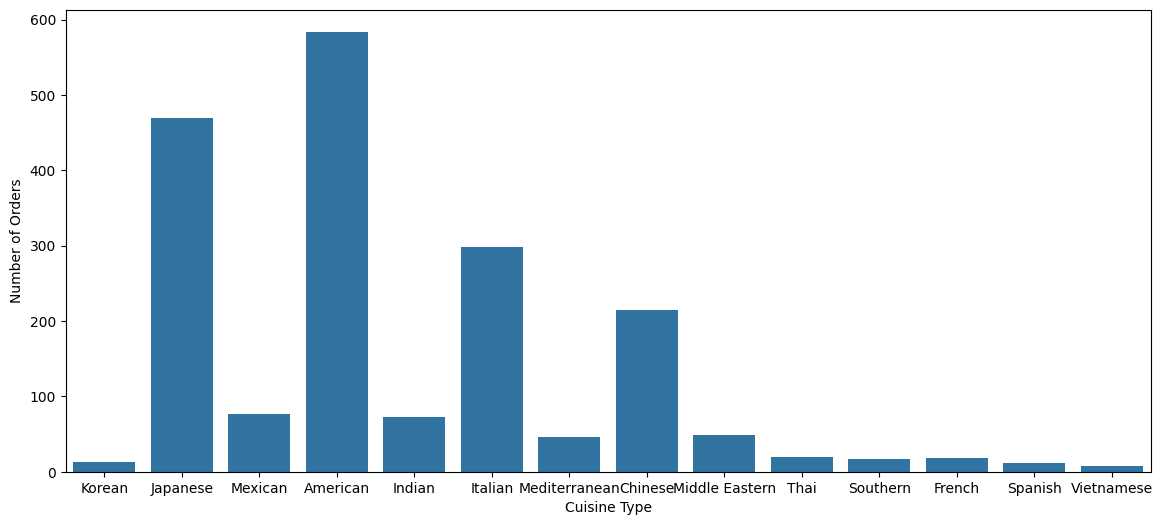

In [ ]:

plt.figure(figsize=(14, 6))
sns.countplot(data = df, x = 'cuisine_type')
plt.xlabel('Cuisine Type')   # X-axis label
plt.ylabel('Number of Orders')
plt.show()

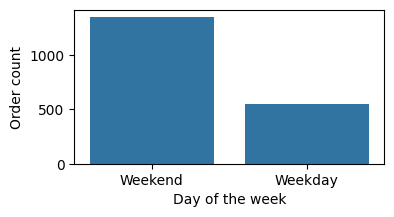

In [ ]:
plt.figure(figsize=(4, 2))
sns.countplot(data = df, x = 'day_of_the_week')
plt.ylabel('Order count')
plt.xlabel('Day of the week')
plt.show()

In [ ]:
df.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


In [ ]:
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.show()

### The top 5 restaurants in terms of the number of orders received

In [ ]:

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
ord = df.groupby('restaurant_name').count()

In [ ]:
ord.order_id.sort_values(ascending=False)[:5]

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### The most popular cuisine on weekends

In [ ]:

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


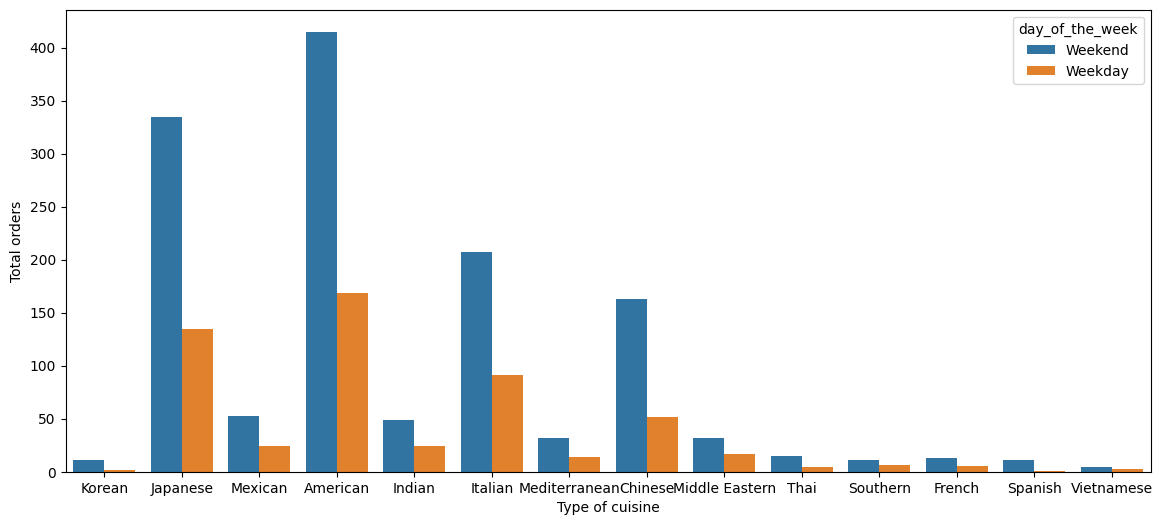

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data = df, x = 'cuisine_type', hue='day_of_the_week')
plt.ylabel('Total orders')
plt.xlabel('Type of cuisine')
plt.show()

#### Observations: Be it weekend or weekday most popular cuisine is american


### Percentage of the orders cost more than 20 dollars

In [ ]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
total_order = df.shape[0]
reqd_order = df[df['cost_of_the_order']>20].shape[0]
print(f'There are {round(reqd_order*100/total_order)}% orders above $20')

There are 29% orders above $20


#### Observations:


### Mean order delivery time

In [ ]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
round(df['delivery_time'].mean())

24

#### Observations:


### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.groupby('customer_id').count()['order_id'].sort_values(ascending=False)[:3]

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:


### Multivariate Analysis

###  Performing a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


In [ ]:
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()
# # there is no strong correlation between the variables

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Write the code here
df1 = df[df.rating!='Not given']
df1.rating = df1.rating.astype(int)

/tmp/ipython-input-66-3608662229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rating = df1.rating.astype(int)


In [ ]:
df2 = df1.groupby('restaurant_name').count()

In [ ]:
df2[df2.rating >50]

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Blue Ribbon Fried Chicken,64,64,64,64,64,64,64,64
Blue Ribbon Sushi,73,73,73,73,73,73,73,73
Shake Shack,133,133,133,133,133,133,133,133
The Meatball Shop,84,84,84,84,84,84,84,84


In [ ]:
s = df1[df1.restaurant_name == 'Blue Ribbon Fried Chicken']
s.rating.mean()

np.float64(4.328125)

In [ ]:
s = df1[df1.restaurant_name == 'Blue Ribbon Sushi']
s.rating.mean()

np.float64(4.219178082191781)

In [ ]:
s = df1[df1.restaurant_name == 'Shake Shack']
s.rating.mean()

np.float64(4.2781954887218046)

In [ ]:
s = df1[df1.restaurant_name == 'The Meatball Shop']
s.rating.mean()

np.float64(4.511904761904762)

these four restaurants has rating counts more than 50 and average rating more than 4


#### Observations:


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df['revenue'] =df[df['cost_of_the_order']>5]['cost_of_the_order']*.15
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,4.6125
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,4.3800
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,3.3465
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,3.7830
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [ ]:
df['revenue1'] = df[df['cost_of_the_order']>20]['cost_of_the_order']*0.1
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,revenue1
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,4.6125,3.075
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,NaN
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,4.3800,2.920
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,3.3465,2.231
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270,NaN
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,3.7830,2.522
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270,NaN


In [ ]:
df['revenue1'].fillna(0, inplace=True)
df['revenue'] = df['revenue'] + df['revenue1']
df.drop('revenue1', inplace = True, axis = 1)
df

/tmp/ipython-input-76-100922247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['revenue1'].fillna(0, inplace=True)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


#### Observations:


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) (Use .round function to round value to nearest zero)

In [ ]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
df['total'] = df['food_preparation_time'] + df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270,54


In [ ]:
round((df[df['total']>60].shape[0])*100/df.shape[0])

11

#### Observations:


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'revenue', 'total'],
      dtype='object')

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


---